剑指 Offer 20. 表示数值的字符串
请实现一个函数用来判断字符串是否表示数值（包括整数和小数）。例如，字符串"+100"、"5e2"、"-123"、"3.1416"、"-1E-16"、"0123"都表示数值，但"12e"、"1a3.14"、"1.2.3"、"+-5"及"12e+5.4"都不是。

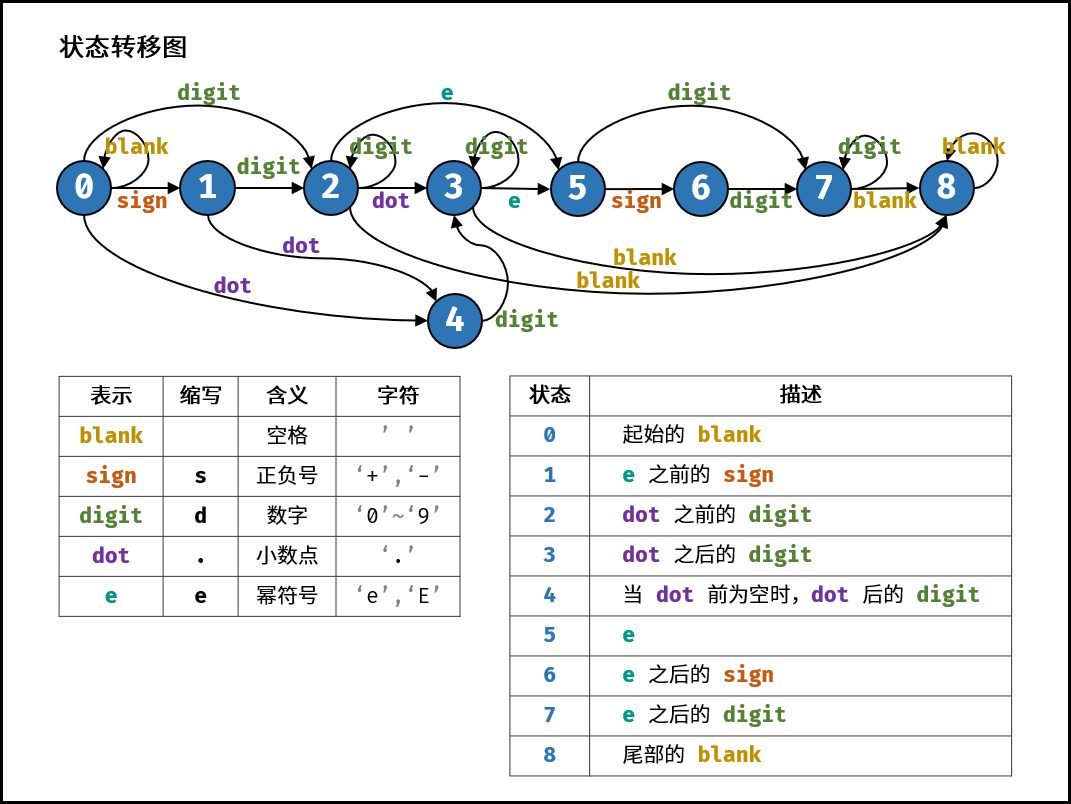

In [3]:
from IPython.display import Image
Image(filename='面试题20. 表示数值的字符串.png')

按照字符串从左到右的顺序，定义以下 9 种状态。
0. 开始的空格（肯定要从零位开始）
1. 幂符号前的正负号（+）
2. 小数点前的数字（+2）
3. 小数点、小数点后的数字（+2.5）
4. 当小数点前为空格时，小数点、小数点后的数字（+0.5）
5. 幂符号（+2.5e）
6. 幂符号后的正负号（+2.5e+）
7. 幂符号后的数字（+2.5e3)
8. 结尾的空格(不能直接从7回到0是因为防止输入字符串本身为“ ”，这并不是合法数字）
合法的结束状态有 2，3，7，8 。

算法流程：
1. 初始化：
1.1 状态转移表 states ： 设 states[i] ，其中 i 为所处状态， states[i] 使用哈希表存储可转移至的状态。键值对 (key, value) 含义：若输入 key ，则可从状态 i 转移至状态 value 。
1.2 当前状态 p ： 起始状态初始化为 p = 0。

2. 状态转移循环： 遍历字符串 s 的每个字符 c 。
2.1 记录字符类型 t ： 分为四种情况。
当 c 为正负号时，执行 t = 's' ;
当 c 为数字时，执行 t = 'd' ;
当 c 为 e , E 时，执行 t = 'e' ;
当 c 为 . , 空格 时，执行 t = c （即用字符本身表示字符类型）;
否则，执行 t = '?' ，代表为不属于判断范围的非法字符，后续直接返回 falsefalse 。
2.2 终止条件： 若字符类型 tt 不在哈希表 states[p] 中，说明无法转移至下一状态，因此直接返回 False 。
2.3 状态转移： 状态 pp 转移至 states[p][t]。(states[p][t] is int)

3. 返回值： 跳出循环后，若状态 p∈(2,3,7,8) ，说明结尾合法，返回 True ，否则返回 False。

In [40]:
#finite state machine

class Solution(object):
    def isNumber(self, s):
        states = [#states is list
            { ' ': 0, 's': 1, 'd': 2, '.': 4 }, # 0.  start with 'blank'
            { 'd': 2, '.': 4 } ,                # 1. 'sign' before 'e'
            { 'd': 2, '.': 3, 'e': 5, ' ': 8 }, # 2. 'digit' before 'dot'
            { 'd': 3, 'e': 5, ' ': 8 },         # 3. 'digit' after 'dot'
            { 'd': 3 },                         # 4. 'digit' after 'dot' (‘blank’ before 'dot')
            { 's': 6, 'd': 7 },                 # 5. 'e'
            { 'd': 7 },                         # 6. 'sign' after 'e'
            { 'd': 7, ' ': 8 },                 # 7. 'digit' after 'e'    为什么digit后的dot不用写？
            { ' ': 8 }                          # 8. end with 'blank'
        ]

        p = 0                           # start with state 0
        for c in s:
            if '0' <= c <= '9': t = 'd' # digit
            elif c in "+-": t = 's'     # sign
            elif c in "eE": t = 'e'     # e or E
            elif c in ". ": t = c       # dot, blank
            else: t = '?'               # unknown
            if t not in states[p]: return False
            p = states[p][t]#求状态p的第t个value（下一个key/value）
            print(p)
        return p in (2, 3, 7, 8)


In [41]:
s="3e5.5 "
num=Solution()
num.isNumber(s)

2
5
7


False